### Load packages

In [106]:
import pandas as pd
import os as os
import seaborn as sns
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import textblob
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wrigh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
os.chdir('C:\\Users\\wrigh\\Downloads')

### Assign Sentiment Scores to articles using TextBlob Sentiment Analyzer 

In [8]:
newsdf = pd.read_csv('News_Headlines_Clean.csv')

In [9]:
sentiment_titles = [round(TextBlob(title).sentiment.polarity, 3) for title in newsdf['title']]
sentiment_titles_category = ['positive' if score > 0.05 
                             else 'negative' if score < -0.05
                             else 'neutral' 
                             for score in sentiment_titles]

In [10]:
newsdf['title sentiment'] = pd.DataFrame(sentiment_titles_category)
newsdf['title sentiment score'] = pd.DataFrame(sentiment_titles)

In [11]:
newsdf.head()

,title,publication,author,date,year,month,content,title sentiment,title sentiment score
0,Hillary Clinton’s point of no return,CNN,Dan Merica,2015-01-01,2015.0,1.0,Washington (CNN) As Democrats close to Hillary...,neutral,0.0
1,Taylor Swift’s year-end gift video brings all ...,CNN,Lisa Respers France,2015-01-01,2015.0,1.0,"(CNN) Way to make us weep, Taylor Swift. As i...",neutral,0.0
2,When is your tweet a threat? (Opinion),CNN,Danny Cevallos,2015-01-02,2015.0,1.0,(CNN) The New York Police Department faced a ...,neutral,0.0
3,Bono says he’s worried he may never play guita...,CNN,Lisa Respers France,2015-01-02,2015.0,1.0,(CNN) Bono has shared with fans that recovery...,neutral,0.0
4,"Donna Douglas, ’Beverly Hillbillies’ Elly May,...",CNN,Todd Leopold,2015-01-02,2015.0,1.0,"(CNN) Donna Douglas, who played voluptuous to...",negative,-0.2


In [12]:
sentiment_content = [round(TextBlob(article).sentiment.polarity, 3) for article in newsdf['content']]
sentiment_content_category = ['positive' if score > 0.05 
                             else 'negative' if score < 0.05
                             else 'neutral' 
                             for score in sentiment_content]

In [13]:
newsdf['content sentiment'] = pd.DataFrame(sentiment_content_category)
newsdf['content sentiment score'] = pd.DataFrame(sentiment_content)

In [14]:
newsdf['content sentiment'].value_counts()

positive    82165
negative    41720
neutral       699
Name: content sentiment, dtype: int64

In [15]:
newsdf['title sentiment'].value_counts()

neutral     69564
positive    34653
negative    20367
Name: title sentiment, dtype: int64

In [16]:
newsdf.to_csv('News Headlines + Sentiment.csv', index = False)

In [17]:
newsdf = pd.read_csv('News Headlines + Sentiment.csv')
newsdf.head()

,title,publication,author,date,year,month,content,title sentiment,title sentiment score,content sentiment,content sentiment score
0,Hillary Clinton’s point of no return,CNN,Dan Merica,2015-01-01,2015.0,1.0,Washington (CNN) As Democrats close to Hillary...,neutral,0.0,positive,0.072
1,Taylor Swift’s year-end gift video brings all ...,CNN,Lisa Respers France,2015-01-01,2015.0,1.0,"(CNN) Way to make us weep, Taylor Swift. As i...",neutral,0.0,positive,0.118
2,When is your tweet a threat? (Opinion),CNN,Danny Cevallos,2015-01-02,2015.0,1.0,(CNN) The New York Police Department faced a ...,neutral,0.0,positive,0.104
3,Bono says he’s worried he may never play guita...,CNN,Lisa Respers France,2015-01-02,2015.0,1.0,(CNN) Bono has shared with fans that recovery...,neutral,0.0,negative,0.033
4,"Donna Douglas, ’Beverly Hillbillies’ Elly May,...",CNN,Todd Leopold,2015-01-02,2015.0,1.0,"(CNN) Donna Douglas, who played voluptuous to...",negative,-0.2,positive,0.144


C:\Users\wrigh\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


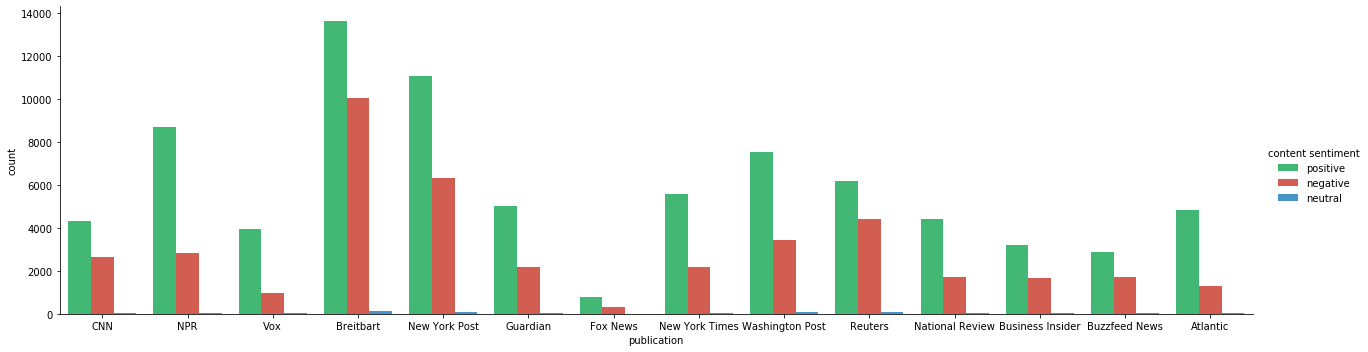

In [18]:
# View sentiments expressed by publication.
publishers = sns.factorplot(x='publication', hue='content sentiment', data=newsdf, kind='count', aspect = 3.5, 
                    palette={'negative': '#e74c3c', 'neutral': '#3498db', 'positive': '#2ecc71'})

In [ ]:
# View Sentiment Distribution.
sns.distplot(newsdf['content sentiment score'], bins = 50)

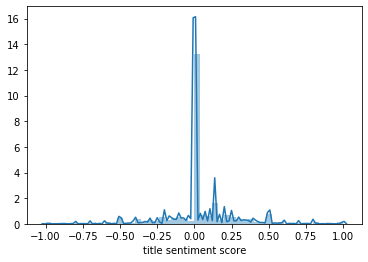

In [131]:
sns.distplot(newsdf['title sentiment score'], bins = 50)

### Sum sentiment Score to obtain overall score for each date

In [96]:
newsdf2 = pd.DataFrame(newsdf.groupby('date')['content sentiment score', 'title sentiment score'].sum())
newsdf2.head()

C:\Users\wrigh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,content sentiment score,title sentiment score
date,,
2015-01-01,0.095000,0.000000
2015-01-02,0.078750,-0.011250
2015-01-03,0.053000,0.006600
2015-01-05,0.000000,0.000000
2015-01-06,0.068333,-0.022333


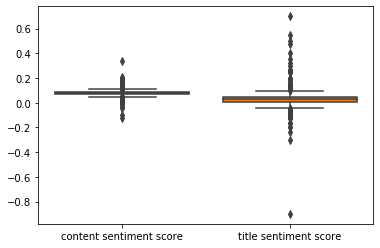

In [98]:
sns.boxplot(data = newsdf2)

In [100]:
summary = newsdf2.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
content sentiment score,821.0,0.078363,0.026486,-0.121,0.070045,0.077231,0.085316,0.337
title sentiment score,821.0,0.028909,0.073039,-0.900,0.007226,0.027132,0.043714,0.700


In [102]:
newsdf2.to_csv('sentiment score.csv', index = True)

### Take Mean of Sentiments to obtain average score by article per day. 

In [ ]:
newsdf4 = pd.DataFrame(newsdf.groupby('date')['content sentiment score', 'title sentiment score'].mean())
newsdf4.head()

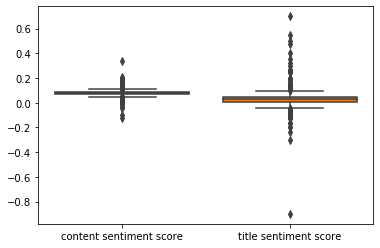

In [98]:
sns.boxplot(data = newsdf4)

In [100]:
summary = newsdf4.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
content sentiment score,821.0,0.078363,0.026486,-0.121,0.070045,0.077231,0.085316,0.337
title sentiment score,821.0,0.028909,0.073039,-0.900,0.007226,0.027132,0.043714,0.700


In [102]:
newsdf4.to_csv('sentiment score2.csv', index = True)

### Make Corpus for Text Analysis
#### Make function to fill corpus

In [4]:
newsdf.count()

title          124690
publication    124690
author         124690
date           124690
year           124690
month          124690
content        124690
dtype: int64

In [5]:
# Do in chunks on Laptop, 20 minutes per 10,000. Utilize lab computers for final corpus.
corpus_content = []
for i in range(0, 10000):
    review_content = re.sub('[^a-zA-z]', ' ', newsdf['content'][i])
    review_content = review_content.lower()
    review_content = review_content.split()
    ps = PorterStemmer()
    review_content = [ps.stem(word) for word in review_content if not word in set(stopwords.words('english'))]
    review_content = ' '.join(review_content)
    corpus_content.append(review_content)

In [6]:
corpus_content[9999]

'bill new comedi michael moor invad next ungener condescend unfunni characterist typifi propaganda also describ sorri state contemporari polit humor declin millennium moor larg blame sinc first distort documentari roger use stridenc partisanship snark despoil art form demean polit discours moor jovial pretens immedi divis start satir proposit american foreign polici januari quietli summon pentagon meet joint chief staff branch repres armi air forc marin michael said know fuck casual jibe introduc film premis moor bumptiou american visit global site bloodless social revolut finland norway iceland itali franc slovenia tunisia portug seek counterpoint unit state repeatedli done wrong invad next millionair moor goofbal imit presid obama european trunk show describ apolog tour matter moor turn sentiment patriot film end posit shallow neither credibl moor distinct maker documentari mockumentari realli mock idea journalist fair thorough report care convinc like imperi tv progeni jon stewart b

In [8]:
corpus_title = []
for i in range(0,124690):
    review_title = re.sub('[^a-zA-z]', ' ', newsdf['title'][i])
    review_title = review_title.lower()
    review_title = review_title.split()
    ps2 = PorterStemmer()
    review_title = [ps2.stem(word) for word in review_title if not word in set(stopwords.words('english'))]
    review_title = ' '.join(review_title)
    corpus_title.append(review_title)

In [10]:
corpus_title[124689]

'trump want us defend valu one'

In [ ]:
content = pd.DataFrame(data = content_corpus)
content.to_csv('content_corpus.csv', index = False)

In [119]:
content_corpus = pd.read_csv('content_corpus.csv')

In [14]:
titles = pd.DataFrame(data = corpus_title)
titles.to_csv('title_corpus.csv', index = False)

In [120]:
title_corpus = pd.read_csv('title_corpus.csv')

### Find most used words and bigrams

In [140]:
# Most Used Words with stopwords.
def top_words(content_corpus, n=None):
    cv = CountVectorizer().fit(content_corpus)
    bagofwords = cv.transform(content_corpus)
    sum_words = bagofwords.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_words(newsdf['content'], 20)
for word, freq in common_words:
    print(word, freq)
topwords = pd.DataFrame(common_words, columns = ['content' , 'count'])
common = topwords.groupby('content').sum()['count'].sort_values(ascending=False)

the 5418621
to 2659646
of 2402516
and 2282926
in 1910715
that 1360144
for 899156
is 896357
it 835333
on 832761
he 688602
was 639881
with 629478
as 596894
said 507019
his 468561
at 462348
have 445471
by 439149
but 438669


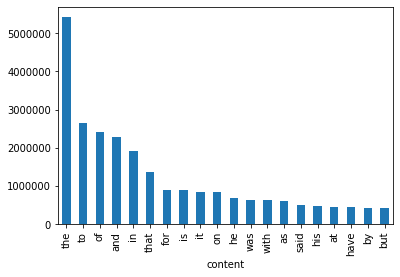

In [142]:
common.plot.bar()

In [143]:
# Most Used Words with stopwords removed.
def words_content(content_corpus, n=None):
    cv = CountVectorizer(stop_words = 'english').fit(content_corpus)
    bagofwords = cv.transform(content_corpus)
    sum_words = bagofwords.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = words_content(newsdf['content'], 20)
for word, freq in common_words:
    print(word, freq)
content_words = pd.DataFrame(common_words, columns = ['content' , 'count'])
words = content_words.groupby('content').sum()['count'].sort_values(ascending=False)

said 507019
trump 409872
people 227554
new 185570
like 162359
president 154028
just 145319
time 130074
clinton 120753
state 114487
says 114234
years 111262
year 100606
mr 95889
told 92182
percent 90618
don 87874
states 87428
did 85039
make 84183


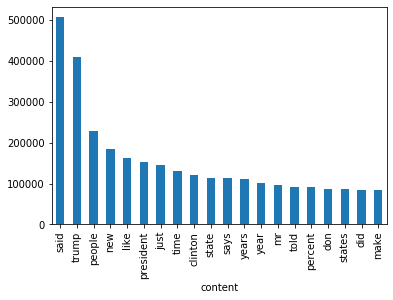

In [144]:
words.plot.bar()

In [147]:
# Get most used bigrams and remove stopwords
def bigram(content_corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(content_corpus)
    bagofwords = cv.transform(content_corpus)
    sum_words = bagofwords.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
bigram_words = bigram(newsdf['content'], 20)
for word, freq in bigram_words:
    print(word, freq)
bigrams = pd.DataFrame(common_words, columns = ['content' , 'count'])
grams = bigrams.groupby('content').sum()['count'].sort_values(ascending=False)

donald trump 65204
united states 52913
new york 50954
white house 38956
hillary clinton 33441
mr trump 25841
supreme court 15700
years ago 14731
washington post 14227
trump said 14225
president trump 14147
islamic state 13567
president obama 13042
barack obama 12459
north korea 12185
obama administration 12052
national security 11693
don know 11644
social media 11586
york times 11564


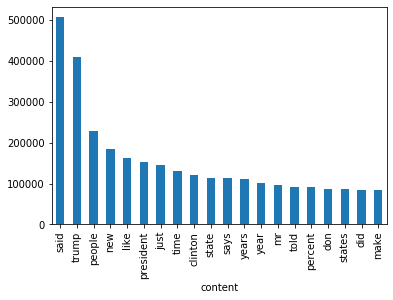

In [150]:
grams.plot.bar()

In [ ]:
# Get most used trigrams and remove stopwords
def trigram(content_corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(content_corpus)
    bagofwords = cv.transform(content_corpus)
    sum_words = bagofwords.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
trigram_words = bigram(newsdf['content'], 20)
for word, freq in bigram_words:
    print(word, freq)
trigrams = pd.DataFrame(common_words, columns = ['content','count'])
trigrams_gram = bigrams.groupby('content').sum()['count'].sort_values(ascending=False)

In [ ]:
trigrams_gram.bar.plot()

### Explore Stock Dataset

In [54]:
stockdf = pd.read_csv('Stock_Data.csv')
stockdf = stockdf.rename(columns = {'Date':'date'})
stockdf.head()

,date,Open,High,Low,Close,Adj Close,Volume,Exchange_Name
0,2015-01-02,17823.070313,17951.779297,17731.300781,17832.990234,17832.990234,76270000,Dow Jones
1,2015-01-02,10859.799805,10889.250000,10770.509766,10830.919922,10830.919922,2708700000,NYSE
2,2015-01-02,14637.299805,14756.299805,14631.400391,14753.700195,14753.700195,132965800,TSX/S&P
3,2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000,NASDAQ
4,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,S&P


In [55]:
stockdf.set_index(['date','Exchange_Name'], inplace = True)

In [58]:
stockdf.head(10)

Open          High           Low  \
date       Exchange_Name                                             
2015-01-02 Dow Jones      17823.070313  17951.779297  17731.300781   
           NYSE           10859.799805  10889.250000  10770.509766   
           TSX/S&P        14637.299805  14756.299805  14631.400391   
           NASDAQ          4760.240234   4777.009766   4698.109863   
           S&P             2058.899902   2072.360107   2046.040039   
2015-01-05 NASDAQ          4700.339844   4702.770020   4641.459961   
           NYSE           10764.370117  10764.370117  10588.049805   
           TSX/S&P        14709.000000  14709.000000  14339.500000   
           Dow Jones      17821.300781  17821.300781  17475.929688   
           S&P             2054.439941   2054.439941   2017.339966   

                                 Close     Adj Close      Volume  
date       Exchange_Name                                          
2015-01-02 Dow Jones      17832.990234  17832.990234    76270000  
           NYSE           10830.919922  10830.919922  2708700000  
           TSX/S&P        14753.700195  14753.700195   132965800  
           NASDAQ          4726.810059   4726.810059  1435150000  
           S&P             2058.199951   2058.199951  2708700000  
2015-01-05 NASDAQ          4652.569824   4652.569824  1794470000  
           NYSE           10607.679688  10607.679688  3799120000  
           TSX/S&P        14392.700195  14392.700195   224213600  
           Dow Jones      17501.650391  17501.650391   116160000  
           S&P             2020.579956   2020.579956  3799120000

In [108]:
sns.boxplot(x = stockdf.index.date, y = 'Close', data = stockdf) 

AttributeError: 'MultiIndex' object has no attribute 'date'

In [66]:
stockdf.to_csv('Stock_Data_sorted.csv', index = False)

### Merge Datasets

In [103]:
df = pd.read_csv('Stock Data + Sentiment2.csv')
df.drop(['Number of Records', 'date'], axis = 1, inplace = True)
df.set_index(['Date','content sentiment score', 'title sentiment score', 'Exchange_Name'], inplace = True)
df.head(15)

Adj Close  \
Date       content sentiment score title sentiment score Exchange_Name                 
2015-01-02 0.078750                -0.011250             Dow Jones      17832.990234   
                                                         NYSE           10830.919922   
                                                         TSX/S&P        14753.700195   
                                                         NASDAQ          4726.810059   
                                                         S&P             2058.199951   
2015-01-05 0.000000                 0.000000             NASDAQ          4652.569824   
                                                         NYSE           10607.679688   
                                                         TSX/S&P        14392.700195   
                                                         Dow Jones      17501.650391   
                                                         S&P             2020.579956   
2015-01-06 0.068333                -0.022333             NASDAQ          4592.740234   
                                                         NYSE           10514.870117   
                                                         S&P             2002.609985   
                                                         TSX/S&P        14246.799805   
                                                         Dow Jones      17371.640625   

                                                                               Close  \
Date       content sentiment score title sentiment score Exchange_Name                 
2015-01-02 0.078750                -0.011250             Dow Jones      17832.990234   
                                                         NYSE           10830.919922   
                                                         TSX/S&P        14753.700195   
                                                         NASDAQ          4726.810059   
                                                         S&P             2058.199951   
2015-01-05 0.000000                 0.000000             NASDAQ          4652.569824   
                                                         NYSE           10607.679688   
                                                         TSX/S&P        14392.700195   
                                                         Dow Jones      17501.650391   
                                                         S&P             2020.579956   
2015-01-06 0.068333                -0.022333             NASDAQ          4592.740234   
                                                         NYSE           10514.870117   
                                                         S&P             2002.609985   
                                                         TSX/S&P        14246.799805   
                                                         Dow Jones      17371.640625   

                                                                                High  \
Date       content sentiment score title sentiment score Exchange_Name                 
2015-01-02 0.078750                -0.011250             Dow Jones      17951.779297   
                                                         NYSE           10889.250000   
                                                         TSX/S&P        14756.299805   
                                                         NASDAQ          4777.009766   
                                                         S&P             2072.360107   
2015-01-05 0.000000                 0.000000             NASDAQ          4702.770020   
                                                         NYSE           10764.370117   
                                                         TSX/S&P        14709.000000   
                                                         Dow Jones      17821.300781   
                                                         S&P             2054.439941   
2015-01-06 0.068333      

In [109]:
df.to_csv('Stock Data + Sentiment Final.csv')

### Move to Machine Learning Model Notebook